# Rakamin x ID/X Partners VIX End-to-end Solution for Credit Loan

# Introduction

__Problem__: We are investors in P2P platforms. There are loans that get charged off in the end. If a loan get charged off or defaulted, we will lost our money. We want to prevent that, and minimize our loss.

__Business Metrics__: Loss, net profit margin.

__Solution explanation__: We will create a machine learning model that can identify if a loan is potentially bad / risky loan. It can be used as an investment decision tools. For the model, we're gonna use some non-parametrical algorithm (with little assumption) because we are not statistician, and statistics is hard. If our model is reliable, our investment in risky loans will decrease, our loss can be minimized and our net profit margin should increase.

__Data__: Lending club credit loan data between 2007 - 2014

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # cool graph
import matplotlib.pyplot as plt # graph

from datetime import datetime as dt
from collections import defaultdict
import time
from warnings import filterwarnings
filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', sep=',')

# Exploring Data

In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.id.nunique()

466285

In [7]:
df.member_id.nunique()

466285

## Statistical Summary

In [8]:
numerical = df.select_dtypes(exclude='object')
categorical = df.select_dtypes(include='object')

In [9]:
numerical.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [10]:
categorical.describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [11]:
cols_to_drop = [
    'Unnamed: 0',
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [12]:
df = df.drop(cols_to_drop, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_title                    438697 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

# Defining Target/ Labeling

In [14]:
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [15]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['bad_credit'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [16]:
df['bad_credit'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_credit, dtype: float64

In [17]:
df.drop('loan_status', axis=1, inplace=True)

# Data Preprocessing

## Feature Engineering

### emp_length

In [18]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')

In [20]:
df['emp_length'] = df['emp_length'].astype(float)

In [21]:
df['emp_length'].describe()

count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

### term

In [22]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

In [24]:
df['term'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64

### earliest_cr_line

In [25]:
df['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [26]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [27]:
df['mths_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_earliest_cr_line'].head(3)

0    396.0
1    225.0
2    194.0
Name: mths_earliest_cr_line, dtype: float64

In [28]:
df['mths_earliest_cr_line'].describe()

count    466256.000000
mean        240.482430
std          93.974829
min        -611.000000
25%         184.000000
50%         226.000000
75%         286.000000
max         588.000000
Name: mths_earliest_cr_line, dtype: float64

In [29]:
df[df['mths_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_earliest_cr_line
1580,Sep-62,2062-09-01,-536.0
1770,Sep-68,2068-09-01,-608.0
2799,Sep-64,2064-09-01,-560.0


In [30]:
df.loc[df['mths_earliest_cr_line']<0, 'mths_earliest_cr_line'] = df['mths_earliest_cr_line'].max()

In [31]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [32]:
df['mths_earliest_cr_line'].describe()

count    466256.000000
mean        243.385374
std          86.460310
min          74.000000
25%         185.000000
50%         227.000000
75%         286.000000
max         588.000000
Name: mths_earliest_cr_line, dtype: float64

### issue_d

In [33]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [34]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [35]:
df['mths_issue_d'].describe()

count    466285.000000
mean         52.255187
std          14.340154
min          37.000000
25%          42.000000
50%          48.000000
75%          58.000000
max         127.000000
Name: mths_issue_d, dtype: float64

### last_pymnt_d

In [36]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [37]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [38]:
df['mths_last_pymnt_d'].describe()

count    465909.000000
mean         32.294369
std          12.809898
min          24.000000
25%          24.000000
50%          25.000000
75%          36.000000
max         121.000000
Name: mths_last_pymnt_d, dtype: float64

### next_pymnt_d

In [39]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [40]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [41]:
df['mths_next_pymnt_d'].describe()

count    239071.000000
mean         23.738136
std           6.082298
min          22.000000
25%          23.000000
50%          23.000000
75%          23.000000
max         121.000000
Name: mths_next_pymnt_d, dtype: float64

### last_credit_pull_d

In [42]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [43]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [44]:
df['mths_last_credit_pull_d'].describe()

count    466243.000000
mean         28.045588
std           9.636423
min          24.000000
25%          24.000000
50%          24.000000
75%          26.000000
max         128.000000
Name: mths_last_credit_pull_d, dtype: float64

## Handling Missing Values

### Check Missing Values

In [45]:
# print the name of columns with missing values (so I can copy paste :D)
missing = df.isnull().sum() * 100 / df.shape[0]
missing[missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_major_derog    78.773926
mths_since_last_delinq         53.690554
mths_next_pymnt_d              48.728567
total_rev_hi_lim               15.071469
tot_cur_bal                    15.071469
tot_coll_amt                   15.071469
emp_title                       5.916553
emp_length                      4.505399
mths_last_pymnt_d               0.080637
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
mths_last_credit_pull_d         0.009007
pub_rec                         0.006219
acc_now_delinq                  0.006219
open_acc                        0.006219
inq_last_6mths                  0.006219
delinq_2yrs                     0.006219
mths_earliest_cr_line           0.006219
total_acc                       0.006219
title                           0.004289
annual_inc                      0.000858
dtype: float64

In [46]:
df.drop(['mths_since_last_record', 'mths_since_last_major_derog'], axis=1, inplace=True)

### Filling Missing Values

In [47]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['emp_length'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)

# Exploratory Data Analysis

## Correlation Check

<AxesSubplot:>

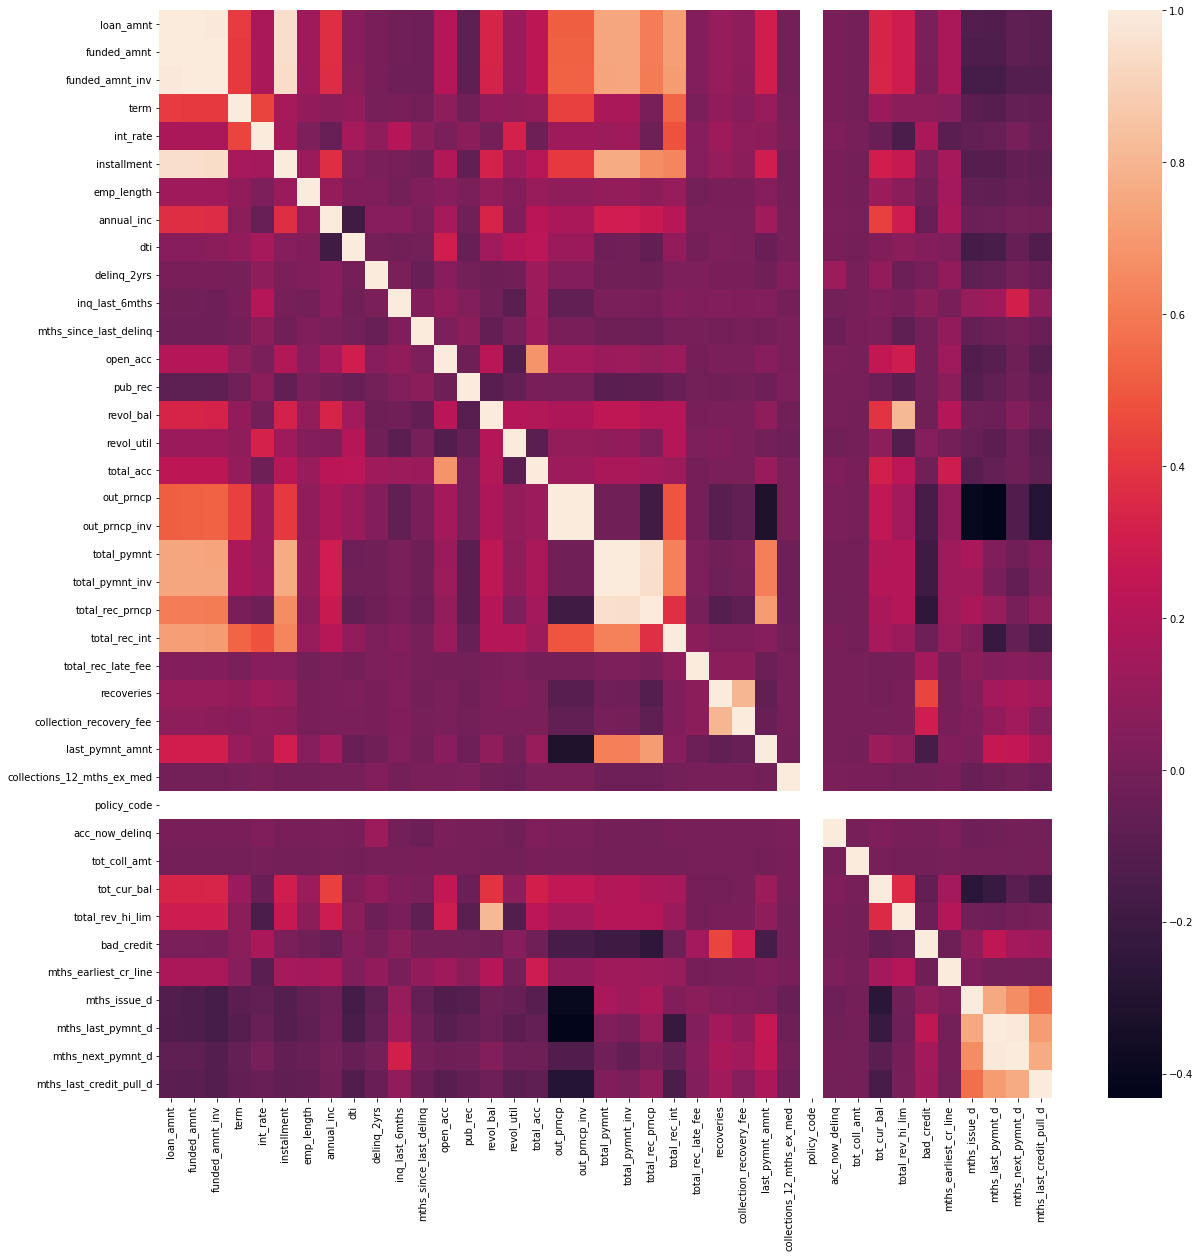

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [49]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [50]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'mths_last_pymnt_d',
 'mths_next_pymnt_d',
 'mths_last_credit_pull_d']

In [51]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

## Features Categorization

In [52]:
categorical = df.select_dtypes(include='object').nunique()
categorical

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [53]:
df.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [54]:
numerical = df.select_dtypes(exclude='object').nunique()
numerical

loan_amnt                       1352
term                               2
int_rate                         506
emp_length                        11
annual_inc                     31902
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
mths_since_last_delinq           146
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        113
out_prncp                     135665
total_rec_late_fee              5808
recoveries                     22773
collections_12_mths_ex_med         9
policy_code                        1
acc_now_delinq                     6
tot_coll_amt                    6321
tot_cur_bal                   220690
bad_credit                         2
mths_earliest_cr_line            516
mths_issue_d                      91
dtype: int64

In [55]:
df.drop(['policy_code'], axis=1, inplace=True)

In [56]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [57]:
df.drop('pymnt_plan', axis=1, inplace=True)

# Feature Scaling & Transformation

## One Hot Encoding

In [58]:
categorical = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [59]:
onehot = pd.get_dummies(df[categorical], drop_first=True)

In [60]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardization

In [61]:
numerical = [col for col in df.columns.tolist() if col not in categorical + ['bad_credit']]

In [62]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical]), columns=numerical)

In [63]:
std.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_earliest_cr_line,mths_issue_d
0,-1.124392,-0.616225,-0.729587,1.138605,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,...,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.764938,1.446626
1,-1.426088,1.622784,0.330634,-1.523744,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,...,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-0.212425,1.446626
2,-1.438156,-0.616225,0.488979,1.138605,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,...,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.570894,1.446626
3,-0.521001,-0.616225,-0.077850,1.138605,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,...,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,0.226989,1.446626
4,-1.365749,1.622784,-0.261438,-1.257509,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,...,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,0.238553,1.446626


## Transformed Data

In [64]:
df_model = pd.concat([onehot, std, df[['bad_credit']]], axis=1)

# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df_model.drop('bad_credit', axis=1)
y = df_model['bad_credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

# Machine Learning

## Modeling

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy.stats import kstest
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Fucntion for Evaluation

In [69]:
def evaluation(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
  

    list_model = [('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:][:,1]
        
        df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
        df_actual_predicted.index = y_test.index
        
        df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
        df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
        df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
        df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
        df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
        df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        f_score = f1_score(y_test, y_pred)
        fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
        auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
        kolsmir = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])/10
        
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['f1_score'].append(f_score)
        result['AUC'].append(auc)
        result['KS'].append(kolsmir)
        result['duration'].append(duration)
        
    return result

## Evaluation

In [70]:
result = evaluation(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [71]:
result

,model_name,model,accuracy,recall,precision,f1_score,AUC,KS,duration
0,Logistic Regression,LogisticRegression(),0.939651,0.456232,0.981630,0.622940,0.855674,0.560615,14.514930
1,Decision Tree,DecisionTreeClassifier(),0.901970,0.580471,0.548600,0.564085,0.760940,0.560615,25.129174
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.943575,0.486065,0.994978,0.653085,0.872313,0.560615,168.238154


The built model produces good AUC and KS performance. In the world of credit risk modeling, generally AUC above 0.7 and KS above 0.3 are considered good performances.

## Feature Importance

In [72]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [73]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
92,recoveries,0.548392
90,out_prncp,0.158940
91,total_rec_late_fee,0.087351
78,int_rate,0.072509
98,mths_issue_d,0.022539
...,...,...
70,addr_state_VT,0.000000
38,addr_state_ID,0.000000
71,addr_state_WA,0.000000
74,addr_state_WY,0.000000
